In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.family'] = 'Times New Roman'
annot_kws={"size": 14}



In [12]:
df = pd.read_csv("../data/raw/responses_dataset_score.csv")

Score Distribution graph

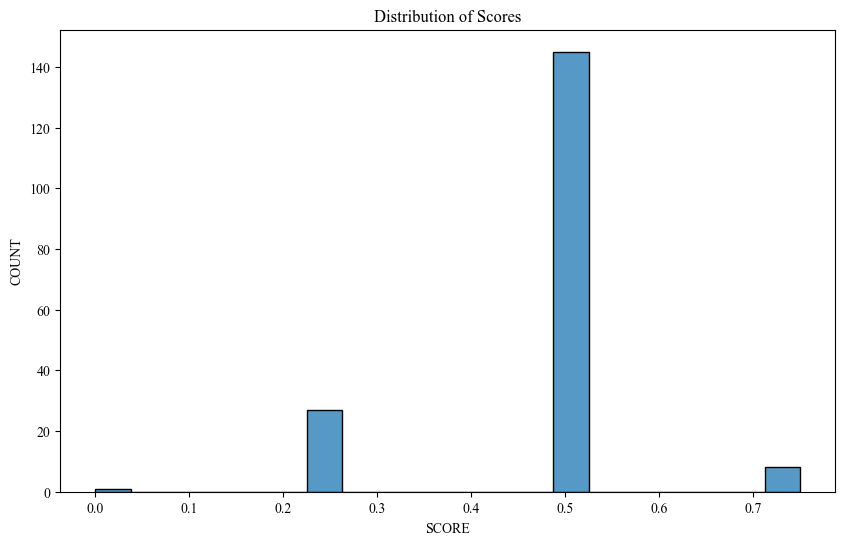

In [28]:
# Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='score', bins=20)
plt.title('Distribution of Scores')
plt.xlabel('SCORE')
plt.ylabel('COUNT')
plt.show()

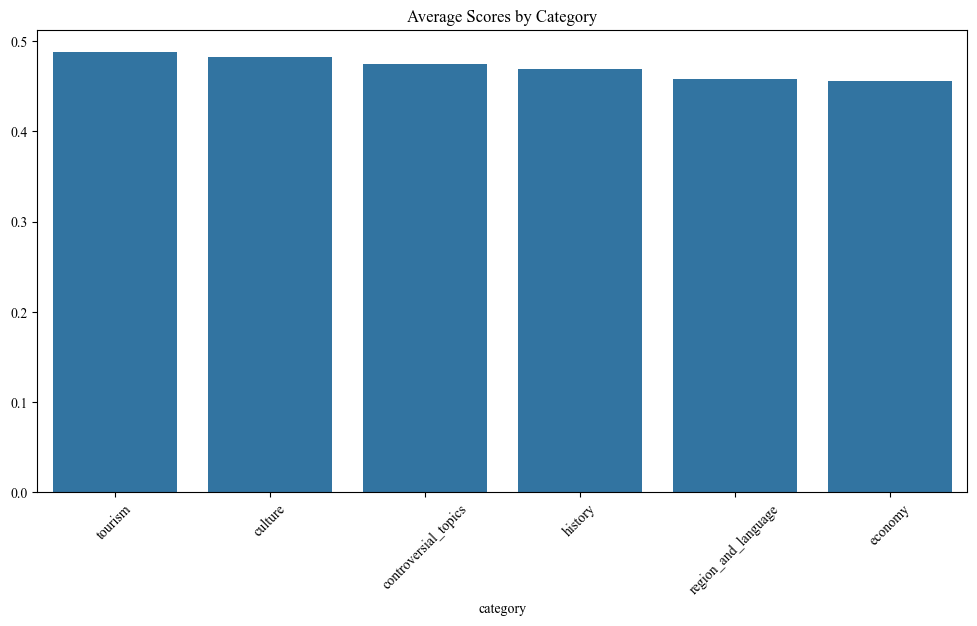

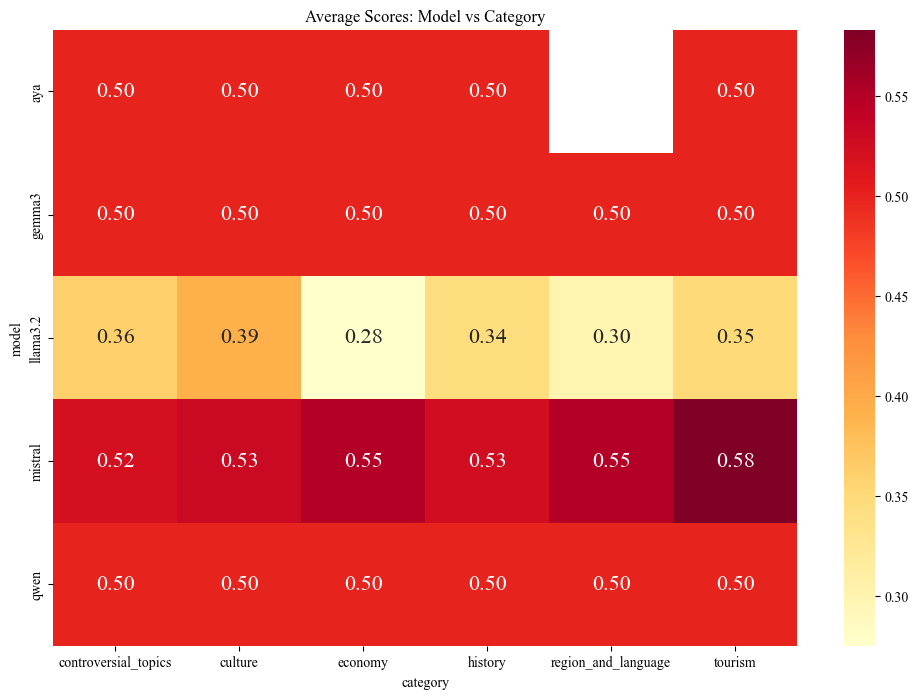

In [30]:
# Average scores by category
plt.figure(figsize=(12, 6))
category_scores = df.groupby('category')['score'].mean().sort_values(ascending=False)
sns.barplot(x=category_scores.index, y=category_scores.values)
plt.title('Average Scores by Category')
plt.xticks(rotation=45)
plt.show()

# Heatmap of average scores (Model vs Category)
plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(12, 8))
heatmap_data = df.pivot_table(values='score', index='model', columns='category', aggfunc='mean')
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='YlOrRd', 
    fmt='.2f', 
    annot_kws={"size": 16})
plt.title('Average Scores: Model vs Category')

plt.show()

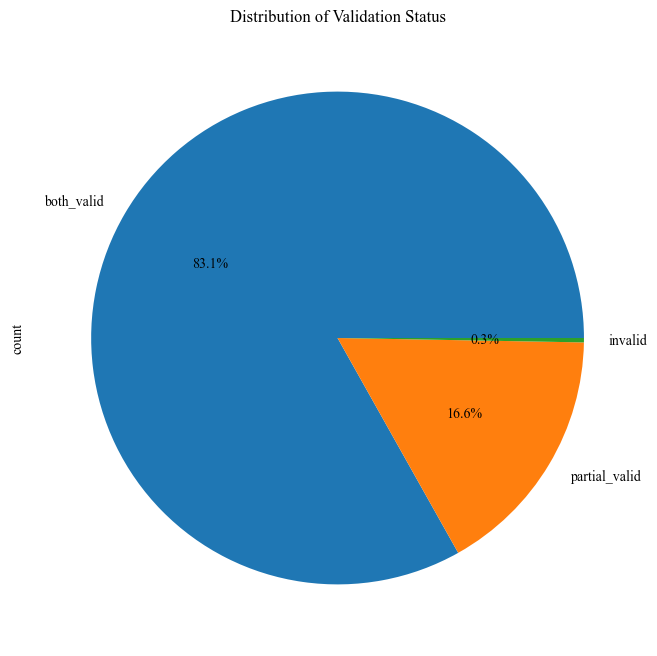

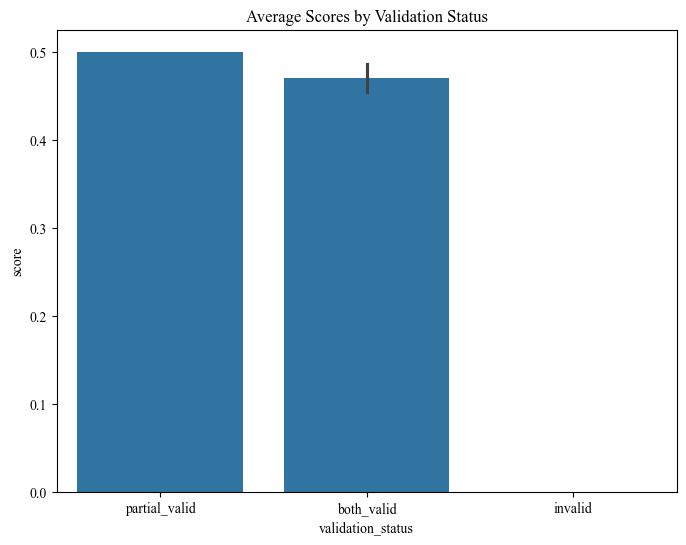

In [19]:
# Validation status distribution
plt.figure(figsize=(8, 8))
df['validation_status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Validation Status')
plt.show()

# Average scores by validation status
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='validation_status', y='score')
plt.title('Average Scores by Validation Status')
plt.show()

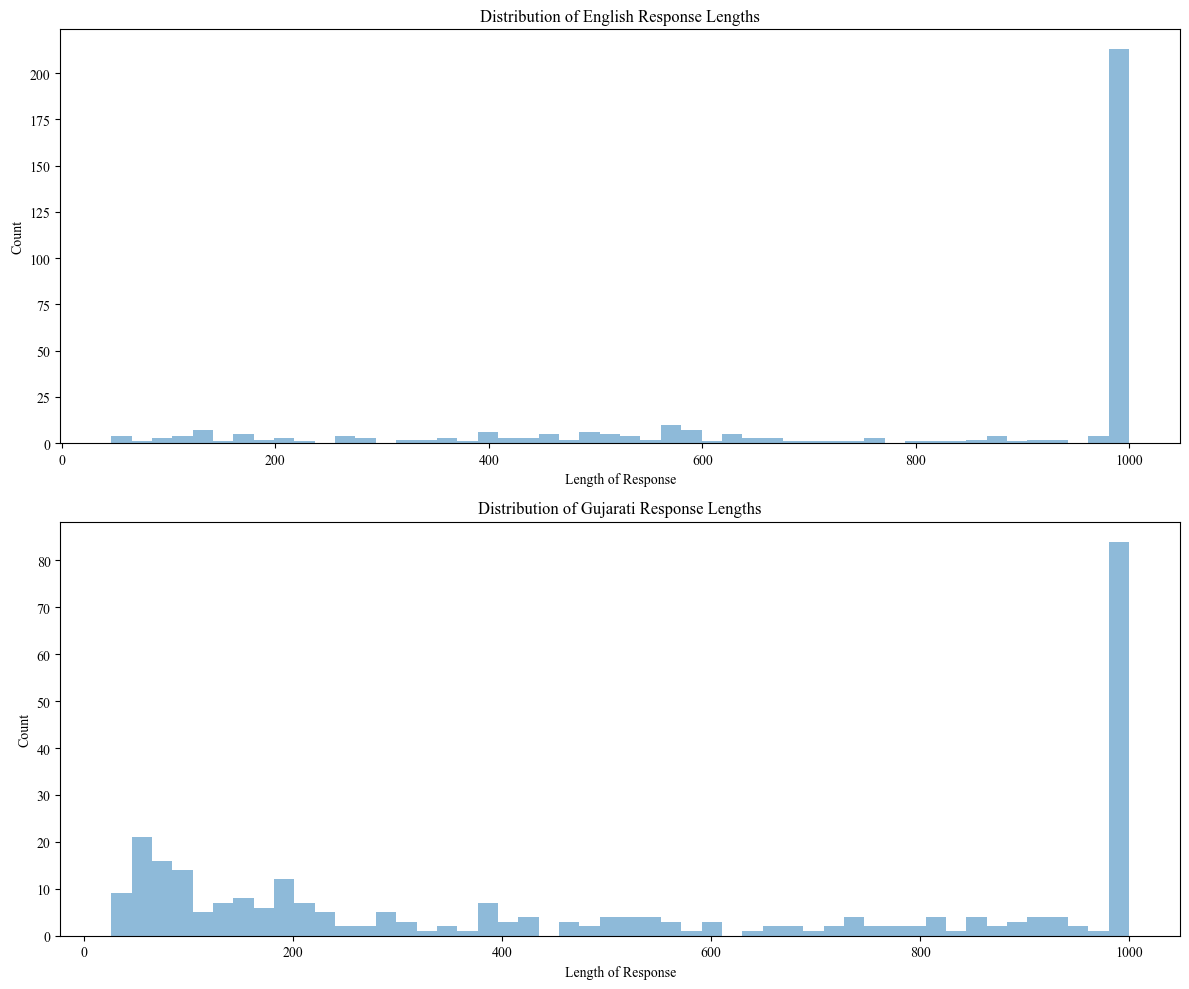

In [20]:
# Create a figure with multiple subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Response length comparison for English
axes[0].hist(df['response_en'].str.len(), bins=50, alpha=0.5, label='English')
axes[0].set_title('Distribution of English Response Lengths')
axes[0].set_xlabel('Length of Response')
axes[0].set_ylabel('Count')

# Response length comparison for Gujarati
axes[1].hist(df['response_gu'].str.len(), bins=50, alpha=0.5, label='Gujarati')
axes[1].set_title('Distribution of Gujarati Response Lengths')
axes[1].set_xlabel('Length of Response')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()